# Notebook to loop through the available datasets and check they load OK

In [1]:
import sys
import os
sys.path.append('/home/jovyan/intake-aodn')
import intake_aodn
import intake

In [2]:
# import logging
# logging.basicConfig()
# logger=logging.getLogger('intake-aodn')
# logger.setLevel(logging.DEBUG)

In [3]:
from intake_aodn.utils import get_local_cluster
client = get_local_cluster()
client

<Client: 'tcp://127.0.0.1:8786' processes=4 threads=8, memory=28.00 GiB>

In [4]:
intake_aodn.cat.aodn_s3.SSTAARS_Daily_Climatology.to_dask()

<xarray.Dataset>
Dimensions:              (DAY_OF_YEAR: 365, LATITUDE: 4500, LONGITUDE: 6000)
Coordinates:
  * DAY_OF_YEAR          (DAY_OF_YEAR) float32 1.0 2.0 3.0 ... 363.0 364.0 365.0
    DEPTH                float32 ...
  * LATITUDE             (LATITUDE) float32 -69.99 -69.97 -69.95 ... 19.97 19.99
  * LONGITUDE            (LONGITUDE) float32 70.01 70.03 70.05 ... 190.0 190.0
Data variables:
    TEMP                 (DAY_OF_YEAR, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 900, 1200), meta=np.ndarray>
    TEMP_change          (LATITUDE, LONGITUDE) float32 dask.array<chunksize=(900, 1200), meta=np.ndarray>
    TEMP_change_std_err  (LATITUDE, LONGITUDE) float32 dask.array<chunksize=(900, 1200), meta=np.ndarray>
    TEMP_mean            (LATITUDE, LONGITUDE) float32 dask.array<chunksize=(900, 1200), meta=np.ndarray>
    TEMP_mean_std_err    (LATITUDE, LONGITUDE) float32 dask.array<chunksize=(900, 1200), meta=np.ndarray>
    TEMP_std_err         (DAY_OF_YEAR, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 900, 1200), meta=np.ndarray>
Attributes: (12/33)
    Conventions:                   CF-1.6,IMOS-1.4
    abstract:                      25 years of Advanced Very High-Resolution ...
    acknowledgement:               The User agrees that whenever the Product ...
    author:                        Galibert, Guillaume
    author_email:                  guillaume.galibert@utas.edu.au
    citation:                      The citation in a list of references is: "...
    ...                            ...
    source:                        One-day composites of night-only sea surfa...
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    time_coverage_end:             2005-12-31T00:00:00Z
    time_coverage_start:           2005-01-01T00:00:00Z
    time_coverage_step:            1.0
    title:                         SST Atlas of Australian Regional Seas (SST...

In [5]:
intake_aodn.cat.aodn_s3.SSTAARS_Monthly_Climatology.to_dask()

<xarray.Dataset>
Dimensions:         (LATITUDE: 4500, LONGITUDE: 6000, MONTH_OF_YEAR: 12)
Coordinates:
    DEPTH           float32 ...
  * LATITUDE        (LATITUDE) float64 -69.99 -69.97 -69.95 ... 19.97 19.99
  * LONGITUDE       (LONGITUDE) float64 70.01 70.03 70.05 ... 189.9 190.0 190.0
  * MONTH_OF_YEAR   (MONTH_OF_YEAR) float64 1.5 2.5 3.5 4.5 ... 10.5 11.5 12.5
Data variables: (12/29)
    TEMP_10th_perc  (MONTH_OF_YEAR, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 4500, 6000), meta=np.ndarray>
    TEMP_20th_perc  (MONTH_OF_YEAR, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 4500, 6000), meta=np.ndarray>
    TEMP_30th_perc  (MONTH_OF_YEAR, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 4500, 6000), meta=np.ndarray>
    TEMP_40th_perc  (MONTH_OF_YEAR, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 4500, 6000), meta=np.ndarray>
    TEMP_50th_perc  (MONTH_OF_YEAR, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 4500, 6000), meta=np.ndarray>
    TEMP_60th_perc  (MONTH_OF_YEAR, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 4500, 6000), meta=np.ndarray>
    ...              ...
    ta_stde_imag    (LATITUDE, LONGITUDE) float64 dask.array<chunksize=(4500, 6000), meta=np.ndarray>
    ta_stde_real    (LATITUDE, LONGITUDE) float64 dask.array<chunksize=(4500, 6000), meta=np.ndarray>
    tm              (LATITUDE, LONGITUDE) float64 dask.array<chunksize=(4500, 6000), meta=np.ndarray>
    tm_stde         (LATITUDE, LONGITUDE) float64 dask.array<chunksize=(4500, 6000), meta=np.ndarray>
    tr              (LATITUDE, LONGITUDE) float64 dask.array<chunksize=(4500, 6000), meta=np.ndarray>
    tr_stde         (LATITUDE, LONGITUDE) float64 dask.array<chunksize=(4500, 6000), meta=np.ndarray>
Attributes: (12/33)
    Conventions:                   CF-1.6,IMOS-1.4
    abstract:                      25 years of Advanced Very High-Resolution ...
    acknowledgement:               The User agrees that whenever the Product ...
    author:                        Galibert, Guillaume
    author_email:                  guillaume.galibert@utas.edu.au
    citation:                      The citation in a list of references is: "...
    ...                            ...
    source:                        One-day composites of night-only sea surfa...
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    time_coverage_end:             2005-12-16T11:15:00Z
    time_coverage_start:           2005-01-15T15:45:00Z
    time_coverage_step:            30.4375
    title:                         SST Atlas of Australian Regional Seas (SST...

In [6]:
dsets = []
for entry in intake_aodn.cat.aodn_s3:
    if isinstance(intake_aodn.cat.aodn_s3[entry],intake_aodn.drivers.RefZarrStackSource):
        print(entry)
        ds=intake_aodn.cat.aodn_s3[entry](startdt='2021-01-01',
                                          enddt='2021-03-01',
                                          cropto=dict(latitude=-32.,longitude=115.,method='nearest')).read()
        dsets.append(ds)
    

SST_L3S_1d_ngt
MODIS_1d_chl_oc3
MODIS_1d_chl_gsm
MODIS_1d_K_490


In [7]:
import xarray as xr
ds = xr.merge(dsets,compat='override')

In [8]:
ds

<xarray.Dataset>
Dimensions:                  (time: 117)
Coordinates:
  * time                     (time) datetime64[ns] 2021-01-01T05:30:00 ... 20...
    latitude                 float32 -32.01
    longitude                float32 115.0
Data variables:
    dt_analysis              (time) float32 nan nan nan 0.4487 ... nan nan nan
    l2p_flags                (time) float32 nan nan nan ... nan nan nan
    quality_level            (time) float32 nan nan nan 2.0 ... nan nan nan nan
    satellite_zenith_angle   (time) float32 nan nan nan 67.63 ... nan nan nan
    sea_surface_temperature  (time) float32 nan nan nan 295.0 ... nan nan nan
    sses_bias                (time) float32 nan nan nan -0.9479 ... nan nan nan
    sses_count               (time) float32 nan nan nan 1.08 ... nan nan nan nan
    sses_standard_deviation  (time) float32 nan nan nan 0.8542 ... nan nan nan
    sst_dtime                (time) float64 nan nan nan ... nan nan nan
    chl_oc3                  (time) float32 nan nan nan nan ... nan nan nan
    chl_gsm                  (time) float32 nan nan nan nan ... nan nan nan
    K_490                    (time) float32 nan nan nan nan ... nan nan nan
Attributes: (12/47)
    Conventions:                CF-1.6
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    Metadata_Link:              TBA
    acknowledgment:             Any use of these data requires the following ...
    cdm_data_type:              grid
    comment:                    HRPT AVHRR experimental L3 retrieval produced...
    ...                         ...
    summary:                    Skin SST retrievals produced from stitching t...
    time_coverage_end:          20210101T151752Z
    time_coverage_start:        20210101T095824Z
    title:                      IMOS L3S Nighttime gridded multiple-sensor mu...
    uuid:                       4d02ee75-876d-4ff0-8956-ab68917c9001
    westernmost_longitude:      70.01000213623047

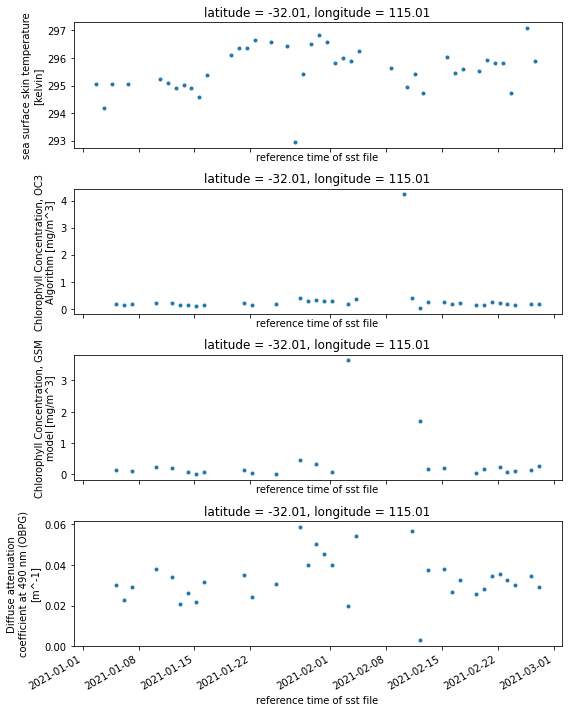

In [9]:
import matplotlib.pyplot as plt
variables = ['sea_surface_temperature','chl_oc3','chl_gsm','K_490']
fig, axs = plt.subplots(len(variables),1,sharex=True,figsize=(8,10))
for i,v in enumerate(variables):
    ds[v].plot(ax=axs[i],marker='.')
fig.tight_layout()